In [6]:
import tweepy
import csv
from tweepy import OAuthHandler
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import Normalize
import random
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Consumer keys and access tokens, used for OAuth
consumer_key = 'XXXXXXXXXXXXXXXXXXXXXXXXX'
consumer_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXX'
access_token_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# Open/Create a file to append data
csvFile = open('muslim_hashtag.csv', 'w')
#Use csv Writer
 
HEADER = ["screen_name","location", "language", "text", "created_at", "retweet_count", "likes_count"]
csvWriter = csv.writer(csvFile)
csvWriter.writerow(HEADER)

#request the keyword as an input
a=input("Enter your keyword to start the search: ")
#search for a hashtag/keyword and write to the CSV file
for tweet in tweepy.Cursor(api.search,q=str.lower(a), count=1000,
                           since="2020-03-01", wait_on_rate_limit=True,).items(1000):
    #print (tweet.user.screen_name, tweet.user.location, tweet.lang, tweet.text, tweet.created_at, tweet.retweet_count, tweet.favorite_count)
    csvWriter.writerow([tweet.user.screen_name, tweet.user.location, tweet.lang, tweet.text, tweet.created_at, tweet.retweet_count, tweet.favorite_count])




Enter your keyword to start the search: iran


### Make a bar plot from the most frequent languages of the tweets

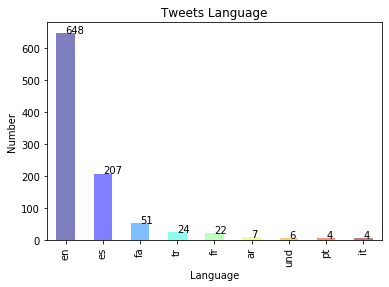

In [7]:
#Create a scatter chart with languages
df=pd.read_csv("muslim_hashtag.csv")
freq=df["language"].value_counts()[df["language"].value_counts()>3]

# Get a color map
my_cmap = cm.get_cmap('jet')
# Get normalize function (takes data in range [vmin, vmax] -> [0, 1])
my_norm = Normalize(vmin=0, vmax=8)
#make a bar plot
color=[i for i in range(0, len(freq))]
freq.plot.bar(color=my_cmap(my_norm(color)), alpha=0.5)
#add the value of each one
for index, value in enumerate(freq):
	plt.text(index, value,  str(value))
plt.ylabel("Number")
plt.xlabel("Language")
plt.title("Tweets Language")
plt.savefig('tweets_lang.pdf', dpi=100)
plt.show()

### Show the frequency of location and save it 

In [8]:
#Create a bar chart with languages
df=pd.read_csv("muslim_hashtag.csv")
freq=df["location"].value_counts()
freq.dropna()
common_freq=df["location"].value_counts()[df["location"].value_counts()>3]
print(common_freq)
freq.to_csv('tweets_location.csv', encoding='utf-8', header=True)


Triesen, Liechtenstein      35
Canada                      29
silicon Valley CA           22
United States               16
Venezuela                   14
Ontario, Canada              7
Toronto, Ontario             7
Europe                       6
London, England              6
Switzerland                  5
Islamic Republic of Iran     4
USA                          4
Florida, USA                 4
Caracas, Venezuela           4
Norway                       4
Washington, DC               4
Tehran                       4
Name: location, dtype: int64


### Extract hashtags from English tweets

In [9]:
#only english text column
df_text=df[df.language=="en"][["text"]]
df_text["text"]=df_text["text"].str.lower().str.replace("https:.*","")
hashtag=[]
for line in df_text["text"]:
    x=re.findall(r"#(\w+)", line, re.UNICODE)
    if x!=[]:
        for item in x:
            hashtag.append(item)
word_could_dict=Counter(hashtag)
print(word_could_dict)

Counter({'iran': 143, 'coronavirus': 57, 'covid19': 33, 'shiraz': 12, 'iranfightscorona': 12, 'ir': 12, 'coron': 12, 'irgc': 7, 'c': 6, 'covid': 5, 'iraniandirectionersalliance': 4, 'covid_19': 4, 'wuhanvirus': 3, 'mek': 3, 'iraqi': 3, 'freeiran2020': 3, 'iraq': 3, 'persiangulf': 3, 'hezbollah': 3, 'ramadan': 2, 'khamenei': 2, 'terrorist': 2, 'drones': 2, 'us': 2, 'breakingnews': 2, 'keepirsanctions': 2, 'iranian': 2, 'rice': 2, 'rouhani': 1, 'thenews': 1, 'qatar': 1, 'news': 1, 'khameneithegreat': 1, 'irancoronavirus': 1, 'm': 1, 'israel': 1, 'modileadingthew': 1, 'tehran': 1, 'iranprotests': 1, 'sanctions': 1, 'github': 1, 'covide19': 1, 'iranregim': 1, 'coronavirusiran': 1, 'qom': 1, 'breaking': 1, 'yemen': 1, 'coronavirusoutbreak': 1, 'i': 1, 'covid2019': 1, 'ncri': 1, 'pmo': 1, 'southkorea': 1, 'islamic': 1, 'zoroastrianism': 1, 'kuwait': 1, 'turkey': 1, 'women': 1, 'civilactivists': 1, 'king': 1, 'mygolrabg': 1, 'architectu': 1, 'freepoliticalprisoners': 1, 'freedualnationals': 1

### Create a Wordcloud from the frequency of the hashtags

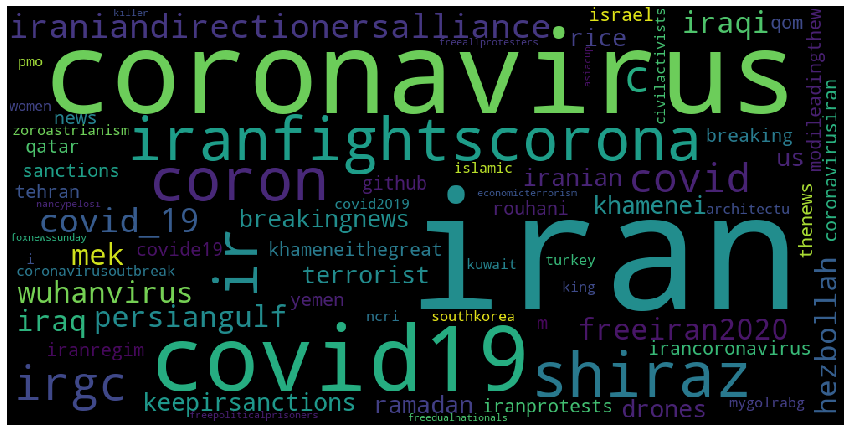

In [10]:
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('tweets_wordcloud.pdf', dpi=100)
plt.show()


### Create a bar chart with most frequent users who tweeted

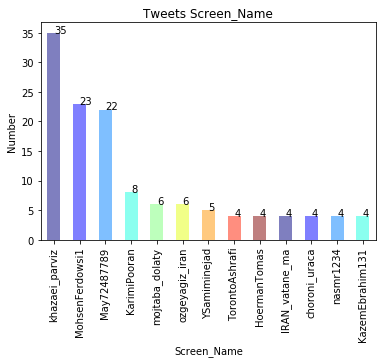

In [11]:
users=df["screen_name"]
freq=df["screen_name"].value_counts()[df["screen_name"].value_counts()>3]
my_cmap = cm.get_cmap('jet')
# Get normalize function (takes data in range [vmin, vmax] -> [0, 1])
my_norm = Normalize(vmin=0, vmax=8)
#make a bar plot
freq.plot.bar(color=my_cmap(my_norm(color)), alpha=0.5)
for index, value in enumerate(freq):
	plt.text(index, value,  str(value))
plt.ylabel("Number")
plt.xlabel("Screen_Name")
plt.title("Tweets Screen_Name")
plt.savefig('tweets_screen_name.pdf', dpi=100)
plt.show()